# LINEAR REGRESSION

###### Linear regression is used for finding linear relationship between target variable ( Y variable) and one or more predictors (X variables). There are two types of linear regression- Simple and Multiple.


### MULTIPLE LINEAR REGRESSION

In [1]:
## CALLING LIBRARIES USED FOR LINEAR REGRESSION

library("tidyverse")
library("ggplot2")

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::

In [2]:
## CHECKING THE CURRENT WORKING DIRECTORY

getwd()

[1] "C:/Users/T0SHIBA/DataScienceInR/lesson-04"

In [3]:
## STORING DATA IN THE CSV FILE TO VARIABLE data
data = read.csv('C:/Users/T0SHIBA/DataScienceInR/data/clean_data_cars.csv')

In [4]:
## VIEWING THE FIRST 6 ROWS USING HEAD() FUNCTION
head(data)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year
4200,BMW,sedan,277,2.0,Petrol,yes,1991
7900,Mercedes-Benz,van,427,2.9,Diesel,yes,1999
13300,Mercedes-Benz,sedan,358,4.7,Gas,yes,2003
23000,Audi,crossover,240,4.2,Petrol,yes,2007
18300,Toyota,crossover,120,2.0,Petrol,yes,2011
40996,Mercedes-Benz,crossover,0,4.7,Petrol,yes,2016


In [5]:
##SUMMARY OF VARIABLES IN THE DATASET; STATISTICAL SUMMARY OF CONTINOUS VARIABLES AND VALUE COUNTS OF CATAGOTICAL VARIABLES
summary(data)

     Price                 Brand            Body         Mileage     
 Min.   :  600   Audi         :420   crossover: 824   Min.   :  0.0  
 1st Qu.: 6999   BMW          :640   hatch    : 268   1st Qu.: 90.0  
 Median :11500   Mercedes-Benz:823   other    : 394   Median :158.0  
 Mean   :15778   Mitsubishi   :307   sedan    :1534   Mean   :162.4  
 3rd Qu.:21900   Renault      :445   vagon    : 379   3rd Qu.:230.0  
 Max.   :44000   Toyota       :510   van      : 626   Max.   :440.0  
                 Volkswagen   :880                                   
    EngineV      Engine.Type   Registration      Year     
 Min.   :0.600   Diesel:1861   no : 371     Min.   :1990  
 1st Qu.:1.800   Gas   : 590   yes:3654     1st Qu.:2003  
 Median :2.200   Other : 106                Median :2007  
 Mean   :2.451   Petrol:1468                Mean   :2006  
 3rd Qu.:3.000                              3rd Qu.:2012  
 Max.   :4.800                              Max.   :2016  
                           

## Price is the Dependent / Predicted variable

#####  I.  All Independent Variables Must have a linear relationship with the Dependent  Variable
##### II. There should be no Multicollinarity : The Independent variables should not have correlation among themseleves¶

In [6]:
## INSTALLING LIBRARY TO PLOT CORRELATION PLOT

##install.packages("ggcorrplot")

In [7]:
library("ggcorrplot")


Warning message:
"package 'ggcorrplot' was built under R version 3.6.3"

In [8]:
## STORING ALL CONTINOUS INTO DATAFRAME "df"

df <- data %>% select(Price,Mileage,EngineV,Year)

In [9]:
## STORING CORRELATION BETWEEN VARIABLES INTO DATAFRAME "df"

corr <- round(cor(df), 1)

In [10]:
corr

,Price,Mileage,EngineV,Year
Price,1.0,-0.6,0.5,0.7
Mileage,-0.6,1.0,0.0,-0.7
EngineV,0.5,0.0,1.0,0.0
Year,0.7,-0.7,0.0,1.0


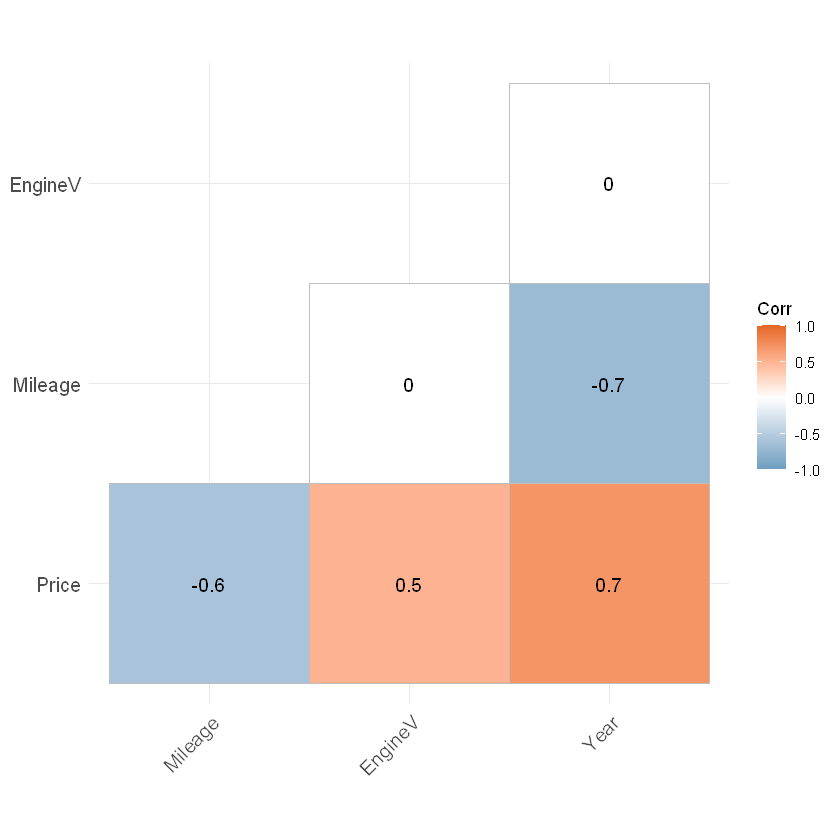

In [11]:
## USING ggcorrplot TO PLOT CORRELATION MATRIX

ggcorrplot(corr,lab=TRUE,type='lower',colors = c("#6D9EC1", "white", "#E46726"))

In [12]:
dim(data)

[1] 4025    8

In [13]:
## SPLITTING DATA INTO TEST AND TRAIN DATA
data_train = slice(data, 1:3000)
data_test = slice(data, 3001:4025)

In [14]:
head(data)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year
4200,BMW,sedan,277,2.0,Petrol,yes,1991
7900,Mercedes-Benz,van,427,2.9,Diesel,yes,1999
13300,Mercedes-Benz,sedan,358,4.7,Gas,yes,2003
23000,Audi,crossover,240,4.2,Petrol,yes,2007
18300,Toyota,crossover,120,2.0,Petrol,yes,2011
40996,Mercedes-Benz,crossover,0,4.7,Petrol,yes,2016


In [15]:
## BUILDING MODEL
model_1 <- lm(Price~Mileage+EngineV+Year+Brand+Body+Engine.Type+Registration, data = data_train)

In [16]:
## SUMMARY OF MODEL
summary(model_1)


Call:
lm(formula = Price ~ Mileage + EngineV + Year + Brand + Body + 
    Engine.Type + Registration, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-27186.4  -3659.9   -774.8   3184.2  28398.0 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.626e+06  4.988e+04 -32.609  < 2e-16 ***
Mileage            -2.930e+01  1.590e+00 -18.435  < 2e-16 ***
EngineV             3.176e+03  1.419e+02  22.386  < 2e-16 ***
Year                8.181e+02  2.477e+01  33.028  < 2e-16 ***
BrandBMW            9.654e+02  4.144e+02   2.329 0.019902 *  
BrandMercedes-Benz -5.403e+01  4.016e+02  -0.135 0.892972    
BrandMitsubishi    -8.191e+03  4.993e+02 -16.404  < 2e-16 ***
BrandRenault       -9.264e+03  4.712e+02 -19.659  < 2e-16 ***
BrandToyota        -4.373e+03  4.462e+02  -9.800  < 2e-16 ***
BrandVolkswagen    -4.260e+03  4.001e+02 -10.649  < 2e-16 ***
Bodyhatch          -5.736e+03  5.195e+02 -11.042  < 2e-16 ***
Bodyother      